Prob <class 'pandas.core.series.Series'>
ground truth <class 'pandas.core.series.Series'>


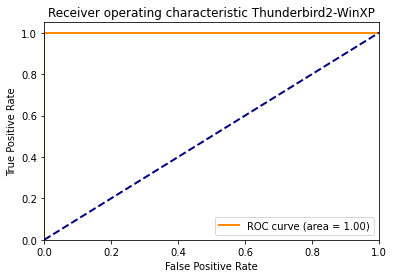

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sys
import pandas as pd
import numpy as np


input_csv = "/Users/seunfuta/Downloads/NIST/OLUSCAN/NEW/Thunderbird2-WinXP.csv"
csv = pd.read_csv(input_csv)
csv
Prob = csv.iloc[:,-1]
app_name_str = input_csv.split("/")[-1].split("-")[0]
ground_truth_bool = csv.iloc[:,0].str.contains(app_name_str)
ground_truth = ground_truth_bool.astype(int)
app_name_disk = input_csv.split("/")[-1].split(".")[0]
fpr = dict()
tpr = dict()
roc_auc = dict()
print("Prob", type(Prob))
print("ground truth",  type(ground_truth))
fpr, tpr, _  = roc_curve(ground_truth,Prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr,tpr,color="darkorange",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc,)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic "+app_name_disk)
plt.legend(loc="lower right")
plt.show()

/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/620517288.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jones_prob = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/620517288.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jones_gt = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/620517288.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  olu_prob = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/620517288.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a fut

jones_gt 0     0
1     0
2     0
3     0
4     0
     ..
11    0
12    0
13    0
14    0
15    1
Length: 64, dtype: int64 jones_prob 0     0.44
1     0.01
2     0.12
3     0.16
4     0.77
      ... 
11    0.65
12    0.28
13    0.61
14    0.00
15    0.45
Length: 64, dtype: float64
olu_gt 0     0
1     0
2     0
3     0
4     0
     ..
11    1
12    1
13    0
14    0
15    0
Length: 80, dtype: int64 olu_prob 0     0.043552
1     0.000975
2     0.012071
3     0.015988
4     0.962853
        ...   
11    1.058303
12    0.972519
13    0.042974
14    0.019214
15    0.003250
Length: 80, dtype: float64


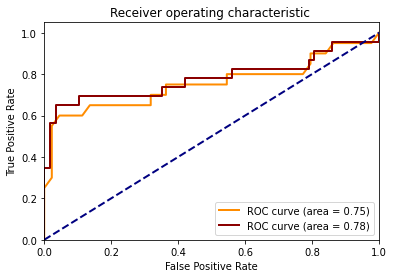

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sys
import pandas as pd
import numpy as np
#!/usr/bin/env python
import os, re
dirlist = os.listdir('.')
jones_pattern = '^jones.*$'
olu_pattern = '^olu.*$'

dir_path = "/Users/seunfuta/Downloads/ROC/"
files = os.listdir(dir_path)
jones_files = []
olu_files = []

for fname in files:
  if re.search(jones_pattern, fname):
    jones_files.append(fname)

for fname in files:
  if re.search(olu_pattern, fname):
    olu_files.append(fname)
jones_prob = pd.Series()
jones_gt = pd.Series()
olu_prob = pd.Series()
olu_gt = pd.Series()

for eachfile in jones_files:
  jones_df = pd.read_csv(dir_path+eachfile)
  jones_prob = jones_prob.append(jones_df.iloc[:,1])
  jones_gt = jones_gt.append(jones_df.iloc[:,-1])

for eachfile in olu_files:
  olu_df = pd.read_csv(dir_path+eachfile)
  olu_prob = olu_prob.append(olu_df.iloc[:,1])
  olu_gt = olu_gt.append(olu_df.iloc[:,-1])


#input_csv = "/Users/seunfuta/Downloads/NIST/OLUSCAN/NEW/Thunderbird2-WinXP.csv"
#csv = pd.read_csv(input_csv)

#csv
#Prob = csv.iloc[:,-1]
#app_name_str = input_csv.split("/")[-1].split("-")[0]
#ground_truth_bool = csv.iloc[:,0].str.contains(app_name_str)
#ground_truth = ground_truth_bool.astype(int)
#app_name_disk = input_csv.split("/")[-1].split(".")[0]
#Jones
fpr_jones = dict()
tpr_jones = dict()
roc_auc_jones = dict()
print("jones_gt", jones_gt, "jones_prob", jones_prob)
fpr_jones, tpr_jones, _jones  = roc_curve(jones_gt,jones_prob)
roc_auc_jones = auc(fpr_jones, tpr_jones)
#Olu
fpr_olu = dict()
tpr_olu = dict()
roc_auc_olu = dict()
print("olu_gt", olu_gt, "olu_prob", olu_prob)
fpr_olu, tpr_olu, _olu  = roc_curve(olu_gt,olu_prob)
roc_auc_olu = auc(fpr_olu, tpr_olu)
plt.figure()
lw = 2
plt.plot(fpr_jones,tpr_jones,color="darkorange",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_jones,)
plt.plot(fpr_olu,tpr_olu,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_olu,)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sys
import pandas as pd
import numpy as np
#!/usr/bin/env python
import os, re
dirlist = os.listdir('.')
jones_pattern = '^jones.*$'
olu_pattern = '^olu.*$'

jones_path = "/Users/seunfuta/Downloads/NIST/JONESSCAN/"
olu_path = "/Users/seunfuta/Downloads/NIST/OLUSCAN/NEWER/"
jones_files = os.listdir(jones_path)
olu_files = os.listdir(olu_path)
jones_files_list = []
olu_files_list = []

for fname in jones_files:
  if re.search(jones_pattern, fname):
    jones_files_list.append(fname)

for fname in olu_files:
  if re.search(olu_pattern, fname):
    olu_files_list.append(fname)
jones_prob = pd.Series()
jones_gt = pd.Series()
olu_prob = pd.Series()
olu_gt = pd.Series()

for eachfile in jones_files:
  jones_df = pd.read_csv(dir_path+eachfile)
  jones_prob = jones_prob.append(jones_df.iloc[:,1])
  jones_gt = jones_gt.append(jones_df.iloc[:,-1])

for eachfile in olu_files:
  olu_df = pd.read_csv(dir_path+eachfile)
  olu_prob = olu_prob.append(olu_df.iloc[:,1])
  olu_gt = olu_gt.append(olu_df.iloc[:,-1])


#input_csv = "/Users/seunfuta/Downloads/NIST/OLUSCAN/NEW/Thunderbird2-WinXP.csv"
#csv = pd.read_csv(input_csv)

#csv
#Prob = csv.iloc[:,-1]
#app_name_str = input_csv.split("/")[-1].split("-")[0]
#ground_truth_bool = csv.iloc[:,0].str.contains(app_name_str)
#ground_truth = ground_truth_bool.astype(int)
#app_name_disk = input_csv.split("/")[-1].split(".")[0]
#Jones
fpr_jones = dict()
tpr_jones = dict()
roc_auc_jones = dict()
print("jones_gt", jones_gt, "jones_prob", jones_prob)
fpr_jones, tpr_jones, _jones  = roc_curve(jones_gt,jones_prob)
roc_auc_jones = auc(fpr_jones, tpr_jones)
#Olu
fpr_olu = dict()
tpr_olu = dict()
roc_auc_olu = dict()
print("olu_gt", olu_gt, "olu_prob", olu_prob)
fpr_olu, tpr_olu, _olu  = roc_curve(olu_gt,olu_prob)
roc_auc_olu = auc(fpr_olu, tpr_olu)
plt.figure()
lw = 2
plt.plot(fpr_jones,tpr_jones,color="darkorange",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_jones,)
plt.plot(fpr_olu,tpr_olu,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_olu,)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/3710475926.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jones_prob = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/3710475926.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jones_gt = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/3710475926.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  olu_prob = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/3710475926.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a

FileNotFoundError: [Errno 2] No such file or directory: '/Users/seunfuta/Downloads/ROC/UPX-W7x32.csv'